In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import *
import nltk

import json 
import pandas as pd 
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Can configure the list below to filter columns from original training data set

# Read JSON file from google drive
train_df = pd.read_json('train.json')

# Read JSON file from data folder
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

filtered_df = train_df[test_cols]

# Add word count column
filtered_df['request_text_count'] = filtered_df['request_text'].str.count(' ') + 1



filtered_df.head()



<ipython-input-103-380c7998e137>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['request_text_count'] = filtered_df['request_text'].str.count(' ') + 1
<ipython-input-103-380c7998e137>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mean_comments'] = np.where(filtered_df['requester_number_of_comments_in_raop_at_request'] > 1, True, False)


,request_title,request_text,request_number_of_comments_at_retrieval,requester_received_pizza,requester_account_age_in_days_at_request,requester_number_of_comments_in_raop_at_request,request_text_count,mean_comments
0,Request Colorado Springs Help Us Please,Hi I am in need of food for my 4 children we a...,0,False,0.000000,0,67,False
1,"[Request] California, No cash and I could use ...",I spent the last money I had on gas today. Im ...,0,False,501.111100,0,16,False
2,"[Request] Hungry couple in Dundee, Scotland wo...",My girlfriend decided it would be a good idea ...,0,False,0.000000,0,59,False
3,"[Request] In Canada (Ontario), just got home f...","It's cold, I'n hungry, and to be completely ho...",4,False,6.518438,0,29,False
4,[Request] Old friend coming to visit. Would LO...,hey guys:\n I love this sub. I think it's grea...,5,False,162.063252,2,102,True


In [ ]:
# Now need to split into features and targets
feature_cols = ['request_text_count', 'request_number_of_comments_at_retrieval']
X = filtered_df[feature_cols]
Y = filtered_df.requester_received_pizza

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

In [ ]:
print('training data shape:', X_train.shape)
print('training label shape:', X_test.shape)
print('test data shape:', Y_train.shape)
print('test label shape:', Y_test.shape)
filtered_df.head()

training data shape: (3030, 2)
training label shape: (1010, 2)
test data shape: (3030,)
test label shape: (1010,)


,request_title,request_text,request_number_of_comments_at_retrieval,requester_received_pizza,requester_account_age_in_days_at_request,requester_number_of_comments_in_raop_at_request,request_text_count,mean_comments
0,Request Colorado Springs Help Us Please,Hi I am in need of food for my 4 children we a...,0,False,0.000000,0,67,False
1,"[Request] California, No cash and I could use ...",I spent the last money I had on gas today. Im ...,0,False,501.111100,0,16,False
2,"[Request] Hungry couple in Dundee, Scotland wo...",My girlfriend decided it would be a good idea ...,0,False,0.000000,0,59,False
3,"[Request] In Canada (Ontario), just got home f...","It's cold, I'n hungry, and to be completely ho...",4,False,6.518438,0,29,False
4,[Request] Old friend coming to visit. Would LO...,hey guys:\n I love this sub. I think it's grea...,5,False,162.063252,2,102,True


In [ ]:
def display_request(num_examples=5):

    for i in range(num_examples):
        print(filtered_df.iloc[i]['request_title']) 
        print(filtered_df.iloc[i]['request_text'])
        print(filtered_df.iloc[i]['request_number_of_comments_at_retrieval'])
        print(filtered_df.iloc[i]['request_text_count'])
        print('Received Pizza: ', filtered_df.iloc[i]['requester_received_pizza']) 
        print('\n')  

        
display_request(5)

Request Colorado Springs Help Us Please
Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated
0
67
Received Pizza:  False


[Request] California, No cash and I could use some dinner
I spent the last money I had on gas today. Im broke until next Thursday :(
0
16
Received Pizza:  False


[Request] Hungry couple in Dundee, Scotland would love some pizza!
My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?
0
59
Received Pizza:  False


[Request] In Canada (Ontario), just got home from school. Need pizza.
It's 

In [ ]:
# Run model against test data
Y_test_pred = logreg.predict(X_test)

pd.DataFrame({'coeff': logreg.coef_[0]}, index=X.columns)


ValueError: X has 2 features per sample; expecting 3

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

In [ ]:
from sklearn import svm
from sklearn import metrics


In [ ]:
clf = svm.SVC(kernel='linear') # Linear Kernel


In [ ]:
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, Y_test_pred))

Accuracy: 0.7574257425742574
              precision    recall  f1-score   support

       False       0.86      0.75      0.80       765
        True       0.44      0.62      0.51       245

    accuracy                           0.71      1010
   macro avg       0.65      0.68      0.65      1010
weighted avg       0.76      0.71      0.73      1010



In [ ]:
# Look at confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_test_pred)
cnf_matrix

array([[570, 195],
       [ 94, 151]])

(3030,)


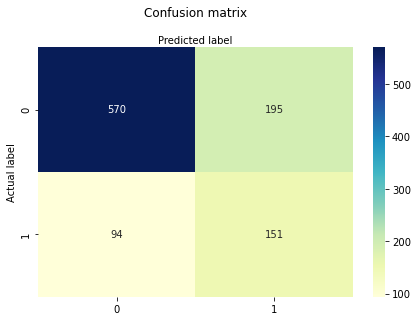

In [ ]:
# Plot results
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(Y_train.shape)

In [ ]:
filtered_df['mean_comments'] = np.where(filtered_df['requester_number_of_comments_in_raop_at_request'] > 1, True, False)


In [ ]:
# Now need to split into features and targets
feature_cols = ['request_text_count', 'request_number_of_comments_at_retrieval', 'mean_comments']
X = filtered_df[feature_cols]
Y = filtered_df.requester_received_pizza

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=0)